In [1]:
from dataloader_comma import *
from torch.utils.data import DataLoader
from module import pad_collate
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter  



/home/jessica/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [4]:
dataset = CommaDataset(dataset_type='test', multitask=True)

In [5]:
dl = DataLoader(dataset, batch_size=1, num_workers=1, collate_fn=pad_collate)

In [18]:
preds_copy_angle = []
preds_lin_angle = []
targets_dist = []
targets_angle = []
preds_copy_dist = []
preds_lin_dist = []

def predict_baseline(signal):
    pred = angle[i-2:i].mean()
    pred_lin = angle[i] + (angle[i] - angle[i-1])
    return pred, pred_lin

for j, batch in enumerate(dl):
    meta, image_array, vego, angle, dist, m_lens, i_lens, s_lens, a_lens, d_lens = batch
    image_array, vego, angle = image_array[0], vego[0], angle[0]
    distance = dist[0]
    for i in range(2, len(angle), 2):
        pred, pred_lin = predict_baseline(angle)
        preds_copy_angle.append(pred)
        targets_angle.append(angle[i])
        preds_lin_angle.append(pred_lin)

        pred, pred_lin = predict_baseline(distance)
        preds_copy_dist.append(pred)
        targets_dist.append(distance[i])
        preds_lin_dist.append(pred_lin)

    '''for j in range(image_array.shape[0]):
        
        elem = image_array[j,:,:].permute(1,2,0)
        d = distance[0][j]
        assert((distance < 0).sum() == 0)
        a = angle[j]
        plt.imshow(np.array(elem).astype(int))
        plt.title(f"d: {d}, a: {a}")
        plt.savefig(f'images_comma/{i}_{j}.png')'''
        


dd 0
dd 1
dd 11
dd 12
dd 13
dd 14
dd 15
dd 16
dd 18
dd 19
dd 2
dd 3
dd 4
dd 5
dd 6
dd 7
dd 8
dd 9


In [19]:
def mse(preds, target):
    return np.sqrt(((np.array(preds)-np.array(target))**2).mean())

In [27]:
def mse_loss(input, target, dist, ignored_index=0.0, reduction="mean"):
        mask = dist == ignored_index
        out = (input[~mask]-target[~mask])**2
        if reduction == "mean":
            return out.mean()
        elif reduction == "None":
            return out

In [29]:
print(mse_loss(preds_copy_angle, targets_angle, targets_dist))
print(mse_loss(preds_lin_angle, targets_angle, targets_dist))

tensor(0.6400)
tensor(0.0900)


In [30]:
print(mse_loss(preds_copy_dist, targets_dist, targets_dist))
print(mse_loss(preds_lin_dist, targets_dist, targets_dist))

tensor(1.4400)
tensor(0.0100)


In [36]:
import pandas as pd
s = pd.Series(distance[0])
s.shape

(100,)

In [48]:
s = s.apply(lambda x: 0 if x > 60 or x <=0 else x)

In [49]:
sfilt = savgol_filter(s, window_length=30, polyorder=3)

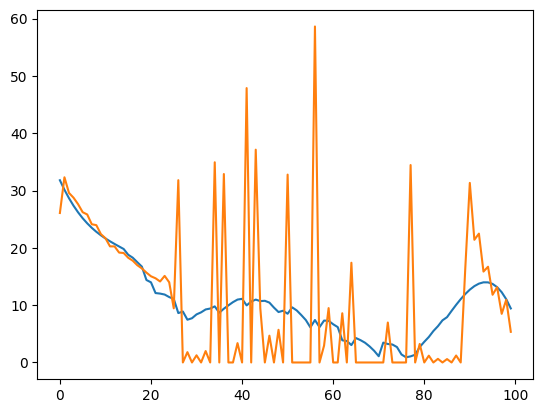

In [24]:
hampel(s, window_size=30, n=1, imputation=True).to_list()

[26.08612823486328,
 32.3187141418457,
 29.585147857666016,
 28.74810218811035,
 27.617727279663086,
 26.226598739624023,
 25.82706642150879,
 24.120628356933594,
 23.966896057128906,
 22.402542114257812,
 21.68364906311035,
 20.26364517211914,
 20.25647735595703,
 19.176227569580078,
 19.106395721435547,
 18.272048950195312,
 17.759817123413086,
 16.970312118530273,
 16.414653778076172,
 15.679743766784668,
 15.04106330871582,
 14.692719459533691,
 14.136428833007812,
 15.111186981201172,
 13.990883827209473,
 9.45240592956543,
 31.814565658569336,
 18.0159330368042,
 1.803236722946167,
 -1.3777210712432861,
 1.2512775659561157,
 -1.3792307376861572,
 1.9925588369369507,
 17.36506462097168,
 34.936065673828125,
 16.692482948303223,
 32.886009216308594,
 -2.532832145690918,
 -0.8492258191108704,
 3.3775157928466797,
 16.692482948303223,
 16.692482948303223,
 16.04719877243042,
 37.13652801513672,
 9.469500541687012,
 -5.366308212280273,
 4.675870418548584,
 -4.763923645019531,
 5.70051

In [31]:
import torch

In [42]:
im = torch.rand((3,240,512))
ang = torch.rand((3, 240, 1))

In [48]:
con = torch.cat((im, ang), dim=-1)

In [60]:
t = torch.tensor(np.array([[1,2,3],[4,5,6]])) 
j = torch.roll(t, shifts=1, dims=1)
j[:,0] = j[:,1]

In [61]:
j

tensor([[1, 1, 2],
        [4, 4, 5]])